In [1]:
from TSInterpret.data import load_data
import pickle
import numpy as np 


# Parameters

In [2]:
dataset='GunPoint'

# Load Data

In [3]:
train_x,test_x, train_y, test_y = load_data.load_basic_dataset(dataset,scaling=None,mode='tf',cwd='/media/jacqueline/Data/UCRArchive_2018/')

In [4]:
print(train_x.shape)
print(test_x.shape)

(50, 150)
(150, 150)


In [5]:
train_x.shape

(50, 150)

In [6]:
train_y.shape

(50,)

# Load Model

In [8]:
model= pickle.load(open(f'../ClassificationModels/models/GunPoint/GunPoint_SVM.sav','rb')).fit(train_x,train_y)
#/media/jacqueline/Data/InterpretabiltyTimeSeries/ClassificationModels/models/GunPoint/GunPoint_SVM.sav

# Explanation Algo

In [9]:
explained_instance = train_x[0]
nb_interpretable_feature = 10
explanation_size = 5
nb_neighbors = 1000
learning_process_name = 'Lime'
transform_name = 'straight_line'

In [12]:
from TSInterpret.InterpretabilityModels.leftist.leftist import LEFTIST

In [13]:
model_to_explain = model
random_state=0


In [14]:
leftist = LEFTIST(model_to_explain,(test_x,None),mode='time', backend='SK')

In [15]:
explanations = leftist.explain(np.array(explained_instance),1000,explanation_size=explanation_size)

time mode
(1, 150)
(1, 150)
0


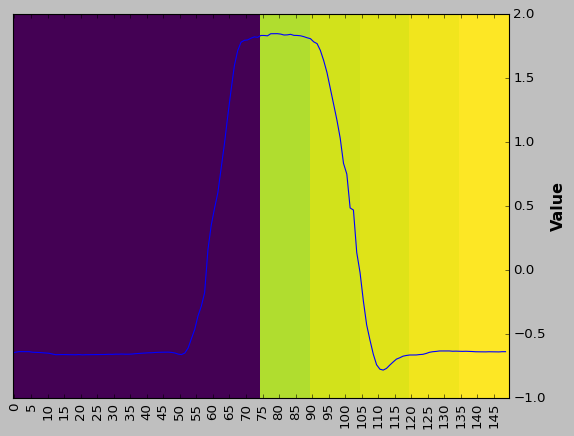

In [19]:
%matplotlib inline
leftist.plot(np.array([explained_instance]).reshape(1,-1,1), np.array([explanations[0]]))